In [2]:
import csv
import matplotlib.pyplot as plt

# Scatter Plots

In [13]:
def anime_plot(x, y):
    x_list, y_list = [], []
    with open('anime.csv', newline='') as csvfile:
        animereader = csv.DictReader(csvfile)
        for title in animereader:
            x_list += [int(title[x])]
            y_list += [int(title[y])]
    plt.plot(x_list, y_list, 'ro')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

## New vs Old

The plot below shows the difference between the start date (when an anime first aired)
and how many favorites it has accrued on anilist. This data represents whether
anime enthusiasts favor the classics or the newer releases. Perhaps recency bias has taken
its hold on the anime community as well?

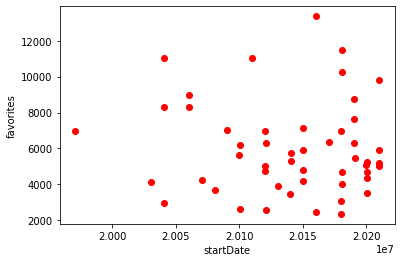

In [14]:
anime_plot('startDate', 'favorites')

## Correlation of Popularity and Favorites

The next plot will look at the relationship between the popularity of a show and the number of favorites. Determining if there is a significant correlation between the two will aid in determining the state of the anime community over time. Popularity is the number of users who have the anime in their list. Anime with greater popularity have a greater number of people who have watched, or are watching, the anime.

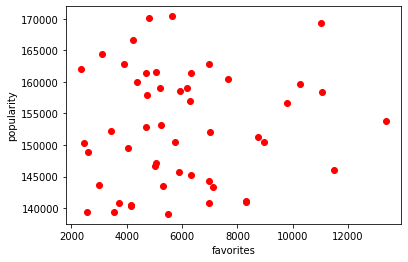

In [19]:
anime_plot('favorites', 'popularity')

## Is Anime Getting Better?

Let's look at the average scores of the titles over time. With this, we can see if anime has gotten better over time, or maybe the community is stuck in the past and can't get over the classics like Akira or One Piece (which to be fair is still airing as of 2022).

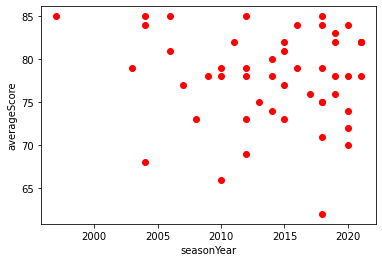

In [47]:
anime_plot('seasonYear', 'averageScore')

# Bar Graphs

In [42]:
def anime_bar(category, y, avg = True):
    d = {}
    with open('anime.csv', newline='') as csvfile:
        animereader = csv.DictReader(csvfile)
        for title in animereader:
            cat = title[category]
            if cat in d:
                val, cnt = d[cat]
                d[cat] = (val + int(title[y]), cnt + 1)
            else:
                if len(d.keys()) > 10: break
                d[cat] = (int(title[y]), 1)
        if avg:
            for cat, (val, cnt) in d.items():
                d[cat] = val // cnt
    
    plt.bar(d.keys(), d.values())
    plt.xlabel(category)
    plt.ylabel(y)
    plt.show()

## Which Season Does the Community Like Best?

The following chart shows which of the seasons has the highest average number of favorites.

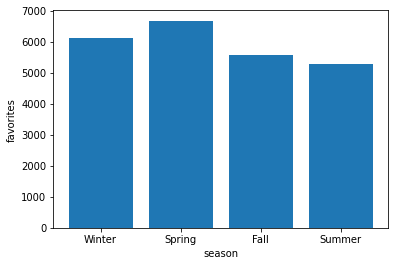

In [43]:
anime_bar('season', 'favorites')

## Which Season Has the Best Shows?

The following chart shows which of the seasons has the highest (average of the) average score for its titles.

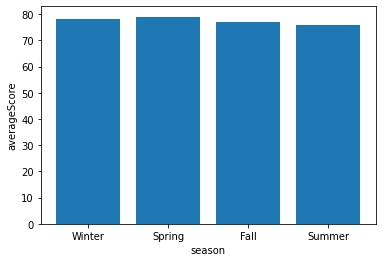

In [44]:
anime_bar('season', 'averageScore')